# Evaluating Overture Maps Places

In [1]:
import ast
import json

import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import yaml

# Parameters

In [2]:
## https://papermill.readthedocs.io/en/latest/usage-parameterize.html"
COUNTRY = "BIH"

## Data

In [3]:
AREA = gpd.read_file("../../data/final/areas/AOI.gpkg")

### Overture Maps

#### Overture Maps Places

In [4]:
PLACES = gpd.read_file(
    f"../../data/raw/overturemaps/overturemaps_2024-06-13-beta.1_places_{COUNTRY}.geojson"
).set_index("id")

PLACES = PLACES.sjoin(AREA[["geometry"]], predicate="within").drop(
    ["index_right"], axis="columns"
)

Vizualing places where `category=school`,

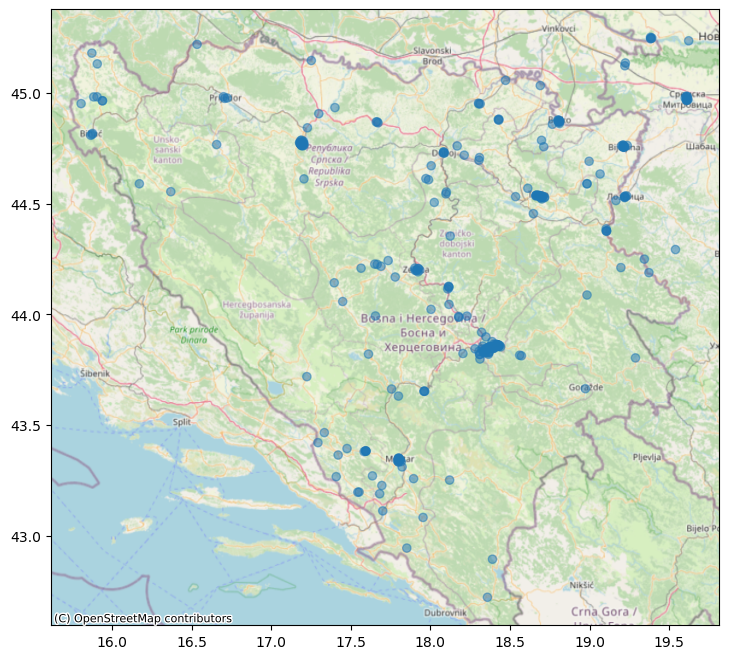

In [5]:
# Plotting the GeoDataFrame with contextily base map
fig, ax = plt.subplots(figsize=(10, 8))

PLACES[PLACES["main_category"].isin(["school"])].plot(
    column="main_category",
    ax=ax,
    alpha=0.5,
    # markersize=gdf['size'],
    marker="o",
    legend=False,
)
ctx.add_basemap(
    ax, crs=PLACES.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik
)

In [6]:
TAXONOMY = pd.read_csv(
    "https://raw.githubusercontent.com/OvertureMaps/schema/main/task-force-docs/places/overture_categories.csv",
    sep=";",
)
TAXONOMY["Overture Taxonomy"] = TAXONOMY["Overture Taxonomy"].apply(yaml.safe_load)

cat = TAXONOMY["Overture Taxonomy"].apply(pd.Series)
cat.columns = ["c_0", "c_1", "c_2", "c_3", "c_4", "c_5"]

TAXONOMY = pd.concat([TAXONOMY, cat], axis="columns")

In [7]:
rs = pd.merge(
    PLACES, TAXONOMY, left_on="main_category", right_on="Category code", how="left"
)
# rs.drop(["Overture Taxonomy"], axis="columns").to_file(
#     f"../../data/final/poi_{COUNTRY}.geojson", driver="GeoJSON"
# )

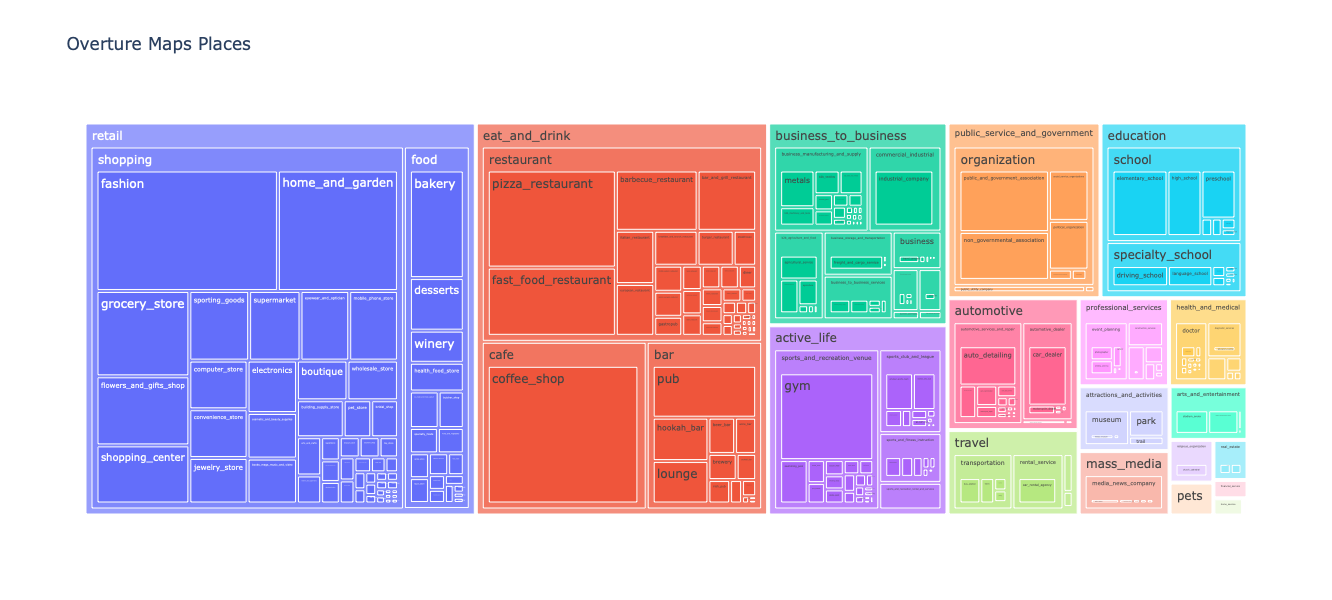

In [8]:
fig = px.treemap(
    rs.value_counts(subset=["c_0", "c_1", "c_2"]).to_frame("count").reset_index(),
    path=["c_0", "c_1", "c_2"],
    # color_discrete_sequence=px.colors.qualitative.Bold,
    values="count",
    title="Overture Maps Places",
    height=600,
)

fig.show()